In [42]:
import os
import numpy as np
import torch
from torch.utils.data import Dataset, DataLoader
from torchvision import transforms
import nibabel as nib
import matplotlib.pyplot as plt

In [43]:
SPLIT = 'train'
DATA_ROOT = f'../AD_NC/{SPLIT}'  # adjust if needed (e.g., /home/groups/comp3710/ADNI/AD_NC)
CLASSES = ['AD', 'NC']  # Alzheimer vs Control
IMAGE_SIZE = 224

# accepted extensions
IMG_EXTS = ('.png', '.jpg', '.jpeg', '.bmp', '.tif', '.tiff')
NII_EXTS = ('.nii', '.nii.gz')

In [44]:
from PIL import Image

class MRIDataset2D(Dataset):
    def __init__(self, root_dir, classes, transform=None):
        self.samples = []
        self.classes = classes
        self.class2idx = {c:i for i,c in enumerate(classes)}
        self.transform = transform

        for c in classes:
            class_dir = os.path.join(root_dir, c)
            for fname in os.listdir(class_dir):
                if fname.lower().endswith(IMG_EXTS):
                    path = os.path.join(class_dir, fname)
                    self.samples.append((path, self.class2idx[c]))

        if len(self.samples) == 0:
            raise RuntimeError(f"No image files found in {root_dir}")

    def __len__(self):
        return len(self.samples)

    def __getitem__(self, idx):
        path, label = self.samples[idx]
        img = Image.open(path).convert('RGB')
        if self.transform:
            img = self.transform(img)
        else:
            t = transforms.Compose([
                transforms.Resize((IMAGE_SIZE, IMAGE_SIZE)),
                transforms.ToTensor(),
                transforms.Normalize([0.5]*3, [0.5]*3)
            ])
            img = t(img)
        return img, label

In [45]:
transform = transforms.Compose([
    transforms.ToTensor(),
    transforms.Resize((IMAGE_SIZE, IMAGE_SIZE)),
    transforms.Normalize([0.5]*3, [0.5]*3)
])

dataset = MRIDataset2D(DATA_ROOT, CLASSES, transform)
loader = DataLoader(dataset, batch_size=4, shuffle=True)

Batch shape: torch.Size([4, 3, 224, 224])
Labels: tensor([0, 0, 1, 1])


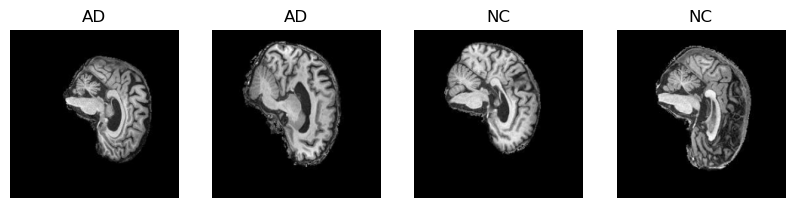

In [46]:
batch_imgs, batch_labels = next(iter(loader))
print("Batch shape:", batch_imgs.shape)
print("Labels:", batch_labels)

plt.figure(figsize=(10,3))
for i in range(len(batch_imgs)):
    plt.subplot(1, len(batch_imgs), i+1)
    plt.imshow(batch_imgs[i].permute(1,2,0)[:, :, 0], cmap='gray')
    plt.title(CLASSES[batch_labels[i]])
    plt.axis('off')
plt.show()